## 隐马尔科夫模型（HMMs）
任何产生输出序列的数据源均可以产生模式。HMMs是一个生成模型，这也就意味着一旦掌握了其底层结构，就可以产生数据。       
HMMs并不能对基础形式的类进行区分，这与哪些可以做类区分的判定模型形成鲜明的对比，但是这些可以做类区分的判定模型却不能生成数据


Means and variances of hidden states:

Hidden state 1
Mean = 8.099
Variance = 0.678

Hidden state 2
Mean = 0.6
Variance = 0.254

Hidden state 3
Mean = 5.092
Variance = 0.677

Hidden state 4
Mean = 2.601
Variance = 0.257


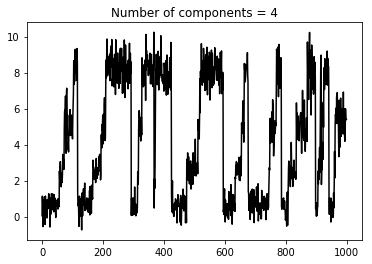

In [2]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn.hmm import GaussianHMM

input_file = 'data_hmm.txt'
data = np.loadtxt(input_file, delimiter=',')
# 将数据按照列的方向堆叠起来用于分析，我们并不需要在技术上做堆叠，因为只有一个列
# 如果有多于一个列要进行分析，可以用以下代码实现
X = np.column_stack([data[:,2]])
# 用4个成分创建并训练HMM。成分的个数是一个需要进行选择的超参数
# 这里选择4个成分就意味着4个潜在状态的生成数据
num_components = 4 # 此数值增大图像会更平滑
model = GaussianHMM(n_components=num_components, covariance_type="diag", n_iter=1000)
model.fit(X)
# 运行预测器以获得隐藏状态
hidden_states = model.predict(X)
# 计算这些写隐藏状态的值和方法
print("\nMeans and variances of hidden states:")
for i in range(model.n_components):
    print("\nHidden state", i+1)
    print("Mean =", round(model.means_[i][0], 3))
    print("Variance =", round(np.diag(model.covars_[i])[0], 3))
# 用模型生成数据
num_samples = 1000
samples, _ = model.sample(num_samples) 
plt.plot(np.arange(num_samples), samples[:,0], c='black')
plt.title('Number of components = ' + str(num_components))
plt.show()

## 用隐马尔科夫模型分析股票市场数据

In [4]:
import datetime

import numpy as np
import matplotlib.pyplot as plt
from hmmlearn.hmm import GaussianHMM

try:
    from matplotlib.finance import quotes_historical_yahoo_ochl
except ImportError:
    from matplotlib.finance import quotes_historical_yahoo as quotes_historical_yahoo_ochl
    
quotes = quotes_historical_yahoo_ochl("INTC", 
        datetime.date(1994, 4, 5), datetime.date(2015, 7, 3))

# Extract the required values
dates = np.array([quote[0] for quote in quotes], dtype=np.int)
closing_values = np.array([quote[2] for quote in quotes])
volume_of_shares = np.array([quote[5] for quote in quotes])[1:]

# Take diff of closing values and computing rate of change
diff_percentage = 100.0 * np.diff(closing_values) / closing_values[:-1]
dates = dates[1:]

# Stack the percentage diff and volume values column-wise for training
X = np.column_stack([diff_percentage, volume_of_shares])

# Create and train Gaussian HMM 
print "\nTraining HMM...."
model = GaussianHMM(n_components=5, covariance_type="diag", n_iter=1000)
model.fit(X)

# Generate data using model
num_samples = 500 
samples, _ = model.sample(num_samples) 
plt.plot(np.arange(num_samples), samples[:,0], c='black')

plt.show()

ModuleNotFoundError: No module named 'matplotlib.finance'